In [1]:
!pip install Kqlmagic --no-cache-dir  --upgrade

You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install matplotlib


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install pandas



You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


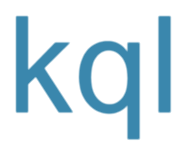

In [4]:
%reload_ext Kqlmagic

In [6]:
%kql AzureDataExplorer://tenant="Unilever.com";code;cluster='dfazuredataexplorer.westeurope';database='dfdataviewer'

In [ ]:
%%kql
let stime = now(-10d);
let etime = now();
let MachineID= "901932";
Common2
//|where MachineId ==MachineId
|where  TS between (stime..etime) and Tag has_any//(
//"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Pressure1" ,
//"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Pressure2" ,
//"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Pressure3" ,
//"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Temperature1" ,
//"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Conductivity" ,
("ABLogix_Comp_Process.Comp Process.Process_Processing_Change _Relay_Comp Process_901932_FQIJ10612_Totalizer")
//| summarize arg_max(TS, Value) by bin(TS, 2m), Tag // summarizes the value by hour
| sort by Tag, TS asc
| parse Tag with *"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_" Test
| evaluate pivot(Test, max(Value),TS) 

In [15]:
df = _kql_raw_result_.to_dataframe()
df.head(30)

,TS,_Empty
0,2023-05-02 19:46:42.115000+00:00,10679067
1,2023-05-02 19:46:47.115000+00:00,10679092
2,2023-05-02 19:46:52.115000+00:00,10679126
3,2023-05-02 19:46:57.115000+00:00,10679151
4,2023-05-02 19:47:02.115000+00:00,10679173
5,2023-05-02 19:47:06.115000+00:00,10679176
6,2023-05-02 19:47:32.115000+00:00,10679223
7,2023-05-02 19:47:37.115000+00:00,10679304
8,2023-05-02 19:47:42.115000+00:00,10679399
9,2023-05-02 19:47:47.115000+00:00,10679471


In [16]:
df.count()


TS        25597
_Empty    25597
dtype: int64

In [17]:
df.isnull().sum()

TS        0
_Empty    0
dtype: int64

In [31]:
df.dtypes


TS        datetime64[ns, UTC]
_Empty                 object
dtype: object

In [32]:
Totalizer=df.groupby(["TS"]).sum()["_Empty"]
Totalizer

TS
2023-04-30 19:29:24.872000+00:00    10559255
2023-04-30 19:31:24.876000+00:00    10559255
2023-04-30 19:33:24.880000+00:00    10559255
2023-04-30 19:35:24.884000+00:00    10559255
2023-04-30 19:37:24.885000+00:00    10559255
                                      ...   
2023-05-10 19:25:53.430000+00:00      273610
2023-05-10 19:25:58.430000+00:00      273635
2023-05-10 19:26:03.430000+00:00      273662
2023-05-10 19:26:08.430000+00:00      273684
2023-05-10 19:26:13.430000+00:00      273708
Name: _Empty, Length: 25597, dtype: object

In [33]:
Totalizer.index.name = None
Totalizer

2023-04-30 19:29:24.872000+00:00    10559255
2023-04-30 19:31:24.876000+00:00    10559255
2023-04-30 19:33:24.880000+00:00    10559255
2023-04-30 19:35:24.884000+00:00    10559255
2023-04-30 19:37:24.885000+00:00    10559255
                                      ...   
2023-05-10 19:25:53.430000+00:00      273610
2023-05-10 19:25:58.430000+00:00      273635
2023-05-10 19:26:03.430000+00:00      273662
2023-05-10 19:26:08.430000+00:00      273684
2023-05-10 19:26:13.430000+00:00      273708
Name: _Empty, Length: 25597, dtype: object

In [34]:
df.head()

,TS,_Empty
0,2023-05-02 19:46:42.115000+00:00,10679067
1,2023-05-02 19:46:47.115000+00:00,10679092
2,2023-05-02 19:46:52.115000+00:00,10679126
3,2023-05-02 19:46:57.115000+00:00,10679151
4,2023-05-02 19:47:02.115000+00:00,10679173


In [35]:
import pandas as pd

In [36]:

Totalizer = Totalizer.reset_index()
Totalizer.head()

,index,_Empty
0,2023-04-30 19:29:24.872000+00:00,10559255
1,2023-04-30 19:31:24.876000+00:00,10559255
2,2023-04-30 19:33:24.880000+00:00,10559255
3,2023-04-30 19:35:24.884000+00:00,10559255
4,2023-04-30 19:37:24.885000+00:00,10559255


In [37]:
Totalizer = Totalizer.reset_index()
Totalizer.tail()

,level_0,index,_Empty
25592,25592,2023-05-10 19:25:53.430000+00:00,273610
25593,25593,2023-05-10 19:25:58.430000+00:00,273635
25594,25594,2023-05-10 19:26:03.430000+00:00,273662
25595,25595,2023-05-10 19:26:08.430000+00:00,273684
25596,25596,2023-05-10 19:26:13.430000+00:00,273708


In [39]:
Totalizer.index = pd.to_datetime(Totalizer.index)

In [41]:
import matplotlib.pyplot as plt

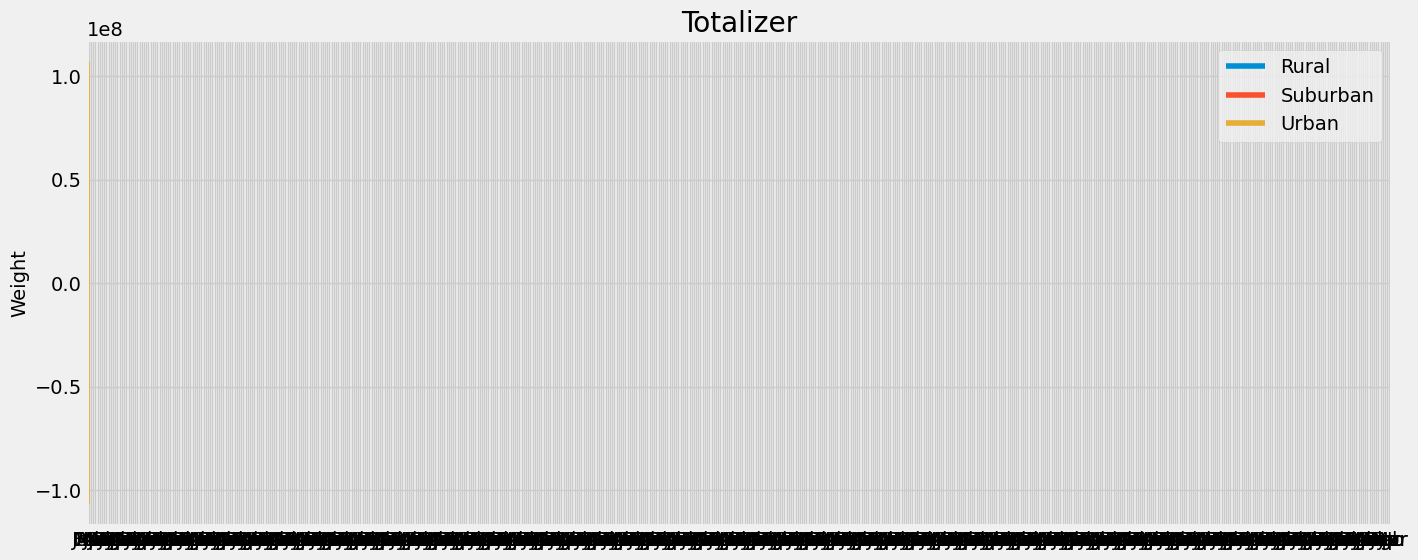

In [45]:
import matplotlib.dates as mdates

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(Totalizer)
ax.set_ylabel('Weight',fontsize=14)
ax.set_xticks(pd.date_range(start = "2019-01-01", end = "2019-04-30", freq="MS"))
ax.set_title("Totalizer")
# Make ticks on occurrences of each month:
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.legend(["Rural","Suburban","Urban"])
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
# Save the figure.
plt.savefig("PyBer_fare_summary.png")

In [ ]:
%%kql
let stime = now(-10d);
let etime = now();
let MachineID= "901932";
Common2
|where MachineId ==MachineId
|where  TS between (stime..etime) and Tag has_any(
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Pressure1" ,
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Pressure2" ,
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Pressure3" ,
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Temperature1" ,
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Conductivity" ,
"ABLogix_Comp_Process.Comp Process.Process_Processing_Change _Relay_Comp Process_901932_FQIJ10612_Totalizer")
| summarize arg_max(TS, Value) by bin(TS, 2m), Tag // summarizes the value by hour
| sort by Tag, TS asc
| parse Tag with *"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_" Test
| evaluate pivot(Test, max(Value),TS) 


TS,Conductivity,Pressure1,Pressure2,Pressure3,Temperature1,_Empty
2023-05-15 15:04:00+00:00,0.07,0.1,-1,-0.1,23.5,842877
2023-05-15 15:06:00+00:00,0.07,0.1,-1,-0.1,23.5,843275
2023-05-15 15:12:00+00:00,0.07,0.1,-1,-0.1,23.5,843275
2023-05-09 17:14:00+00:00,0.07,0.1,-1,-0.1,23.5,115305
2023-05-09 17:16:00+00:00,0.07,0.1,-1,-0.1,23.5,115305
2023-05-09 16:34:00+00:00,0.07,0.1,-1,-0.1,23.5,113648
2023-05-09 16:28:00+00:00,0.07,0.1,-1,-0.1,23.5,113648
2023-05-09 16:08:00+00:00,0.07,0.1,-1,-0.1,23.5,113648
2023-05-09 15:52:00+00:00,0.07,0.1,-1,-0.1,23.5,109144
2023-05-09 15:44:00+00:00,0.07,0.1,-1,-0.1,23.5,109144
